# 11. 변분 추론 (Variational Inference)

- MCMC 방법은 샘플을 통해 사후분포 $p(\theta|D)$를 근사
- 이 방법은 분포의 형태에 대해 어떠한 가정도 필요하지 않기 때문에 편리하지만, 고차원에서는 비효율적일 수 있음
    
- 변분 추론은 대안적인 접근법을 제공
    
    **이는 단순한 함수 형태(예: 적절한 정규분포)를 사용하여 $q(\theta) \approx p(\theta |D)$를 를 적합하고, 추론 작업을 최적화 문제로 전환하는 방식**
    
    (변분 추론은 고차원 문제에 적합하기 때문에, 특히 머신러닝 분야에서 인기가 높음)습니다. 
    
    일반적으로 변분 추론은 유사한 성능의 MCMC 방법보다 최소 10배 이상 빠른 것으로 알려짐

- 변분 알고리즘은 사후분포의 평균을 잘 근사할 수 있지만, 종종 사후분포의 분산은 과소평가하는 경향이 존재. 

*그림은 두 방법의 평균 추정치는 거의 동일한 반면, 변분 추론은 분산을 과소평가하는 경우가 많음을 보여줌*


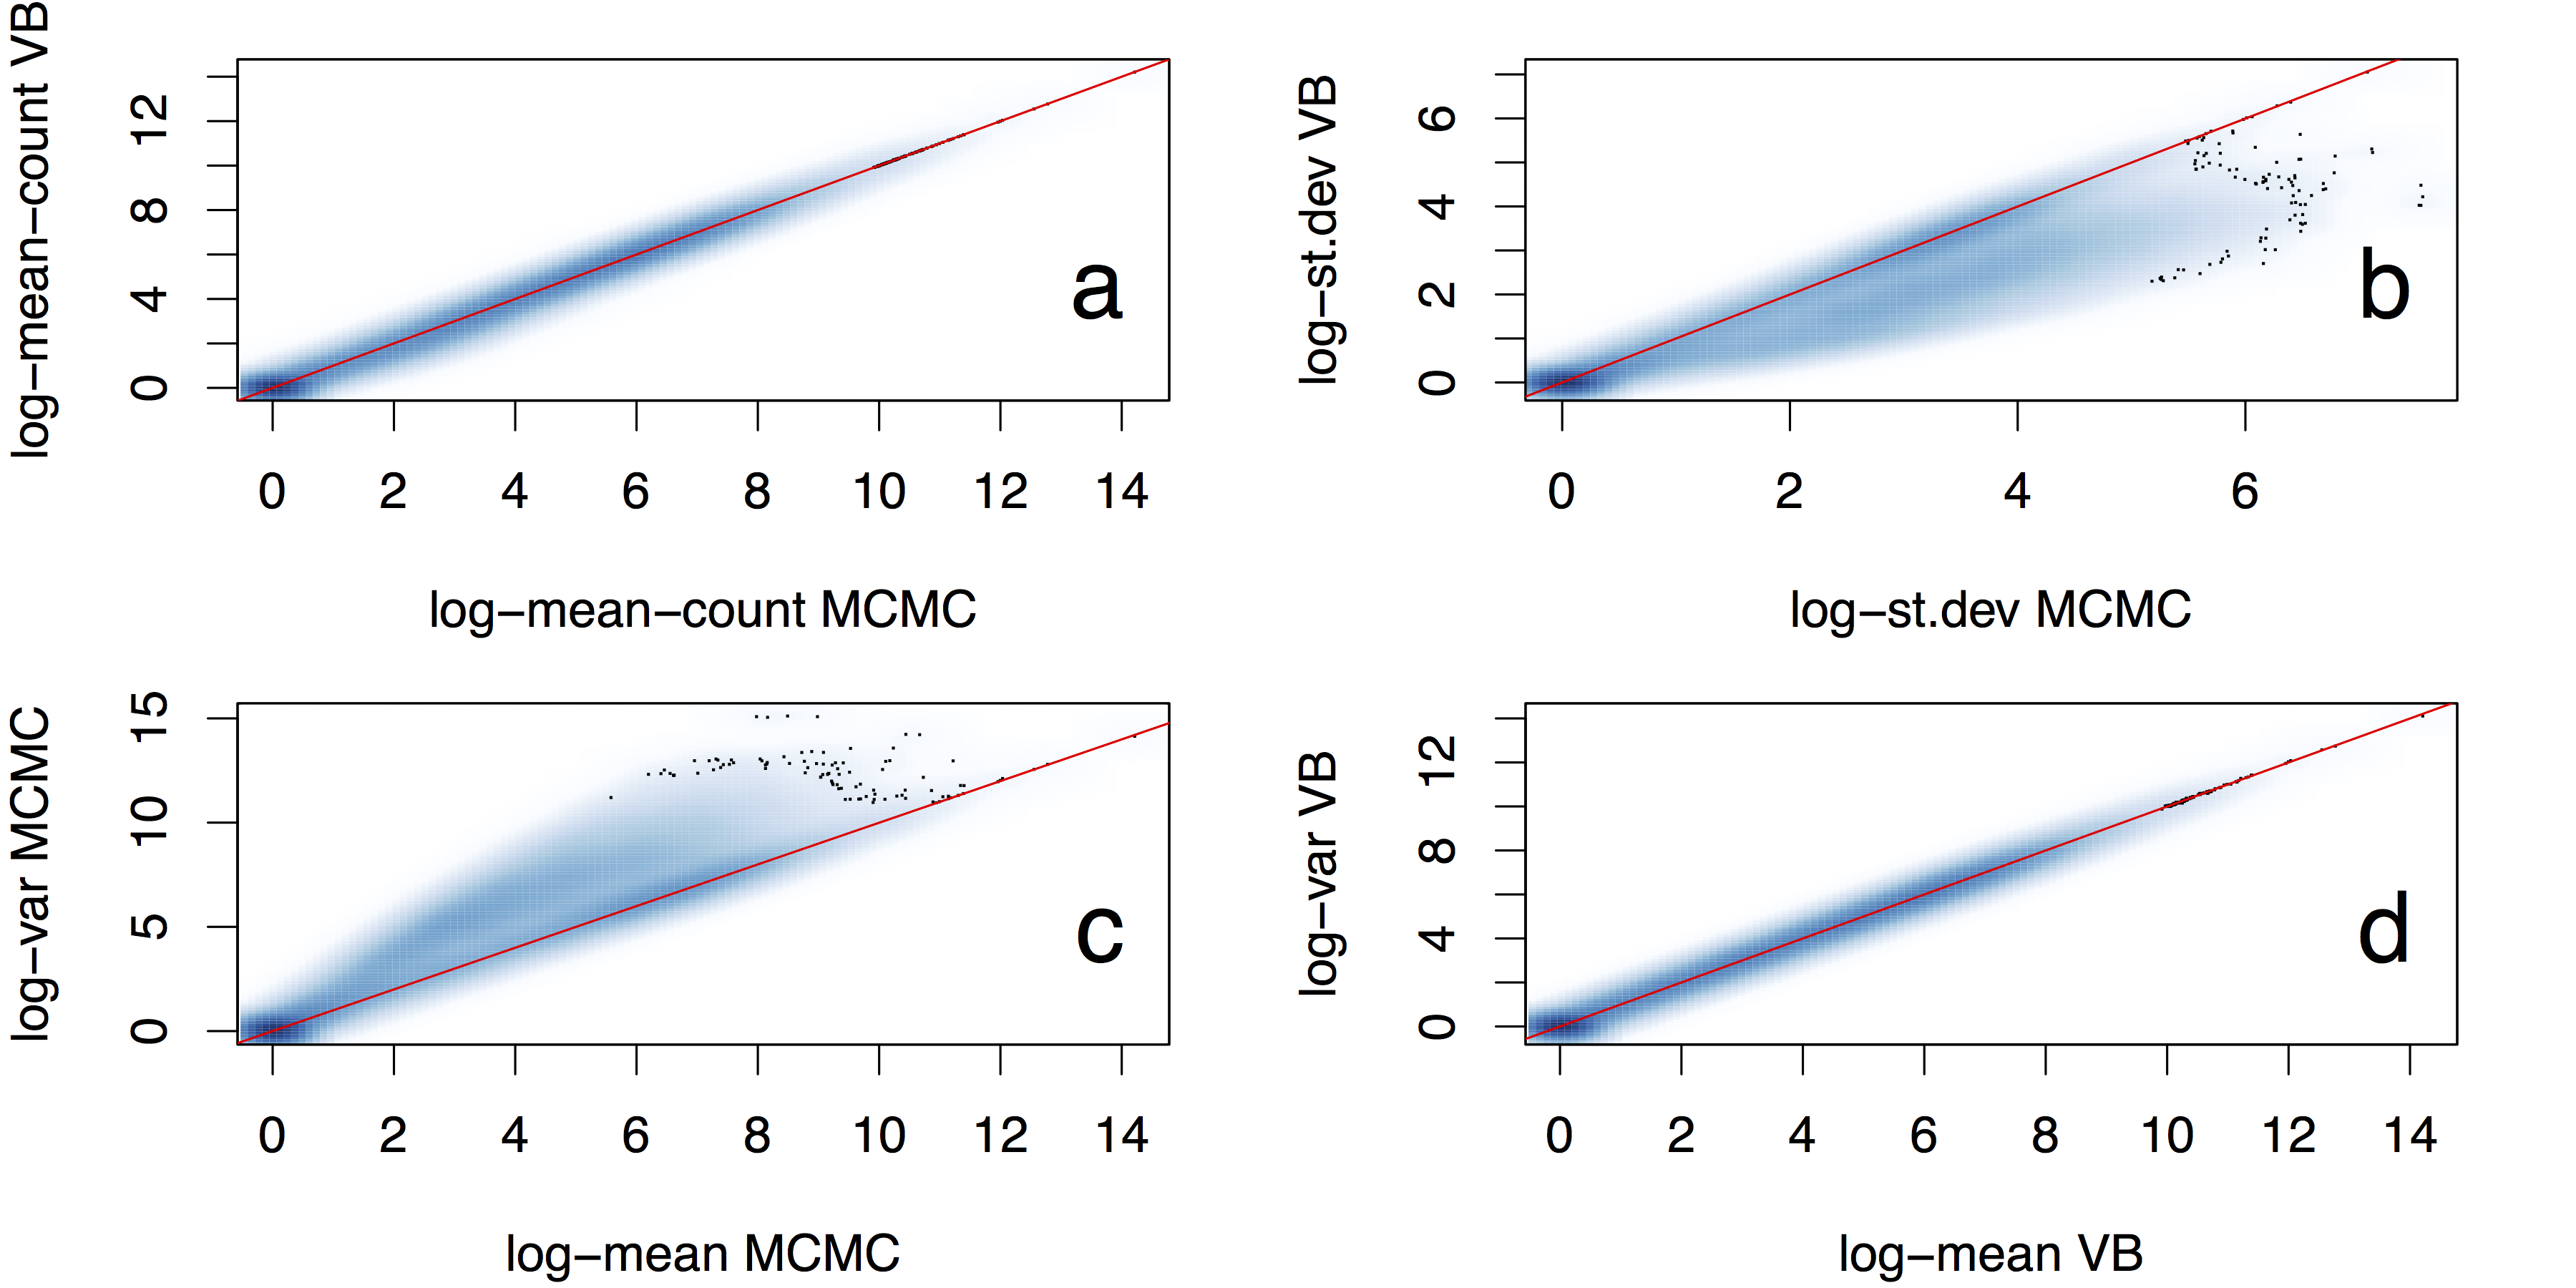



<br>

## 11-01. 변분 추론
- **변분 추론은 사후분포 $p(\theta|D)$에 대해 간단한 함수 형태의 근사분포 $q(\theta)$를 적합하는 방식**
    
    이를 위해 근사분포와 진짜 사후분포 사이의 Kullback–Leibler divergence, 즉
    
$$D_{KL}(q(\theta) || p(\theta | \mathcal{D}))
= \mathrm{E}_{q(\theta)}\left[\log \frac{q(\theta)}{p(\theta | \mathcal{D})}
\right]$$를 최소화

- **Kullback–Leibler divergence는 두 확률 분포 $P$와 $Q$사이의 차이를 측정하는 지표**
    - 보통 $D_{KL} (P||Q)$로 표기하며 그 정의는 $D_{KL}(P||Q) = \int^{\infty}_{-\infty} p(x) log \frac{p(x)}{q(x)}d x$
    
    - KL 발산은 비대칭성을 가짐: $D_{KL} (P||Q) \neq D_{KL}(Q||P)$로, 두 분포 차이를 측정할 때 방향성이 존재
    - KL 발산은 비음수성을 가짐 : $D_{KL}(P||Q) \geq 0$이며, $D_{KL}(P||Q)=0$은 $P$와 $Q$가 거의 모든 곳에서 동일함을 의미
    - **정보 이론적 해석 : KL은 $P$로부터 실제 데이터를 생성했을 때, 이를 $Q$로 모델링할 때 발생하는 정보 손실 (추가적인 불확실성)을 의미**

<br>

- **정확한 KL 발산을 계산하는 것은 보통 어려우므로, 대신 ELBO (Evidence Lower Bound)를 사용**

$$\mathcal{L} = \mathrm{E}_{q(\theta)}\left[\log \frac{p(\theta, \mathcal{D})}{q(\theta)} \right] = \log p(\mathcal{D}) - D_{KL}(q(\theta) || p(\theta | \mathcal{D})).$$

- $D_{KL}(q(\theta)|| p(\theta || D)) \geq 0$이므로, $\mathcal{L} \leq \log p(D)$가 성립


- ELBO를 최적화하면, 
    
    $q(\theta)$가 KL발산 관점에서 사후분포 $p(\theta|D)$를 가장 잘 근사하며,
    
    ELBO의 값이 Marginal Likelihood 근사의 상/하한을 제공하여 모델 비교에 활용될 수 있음

<br>

## 11-02. 이중 확률적 변분 추론 (DSVI), 자동 미분 변분 추론 (ADVI)
- 이중 확률적 변분 추론(DSVI)과 자동 미분 변분 추론(ADVI)은 $q(θ)$에 대한 기대값을 몬테카를로 평가하여 도출 과정을 단순화하는 아이디어에 기반
- 알고리즘들은 재매개변수화 기법을 광범위하게 사용하는데, 
    
    $q(\theta)=N(\theta;\mu, \Sigma)$와 같이 변화하는 분포에 대한 기대값 $E_{q(\theta)}[\cdot]$의 그래디언트를, 재매개변수화된 $\mathbf{\theta} = \mathbf{L} \mathbf{\eta} + \mathbf{\mu},$를 통해 고정분포의 기대값으로 전환할 수 있음을 의미
    
    - 여기서 $\mathbf{\eta} \sim \mathcal{N}(\mathbf{0}, \mathbf{I})$이며, $\mathbf{L}$은 $\Sigma$의 Cholesky 인수로 $\mathbf{L} \mathbf{L}^T = \mathbf{\Sigma}$를 만족
    
- 이에 따라, ELBO는 근사분포 $q(\theta)$에 대한 ELBO는 $\eta$로 재매개변수화 되어

$$\begin{align*}
  \mathcal{L} &= \mathrm{E}_{q(\boldsymbol{\theta})}\left[\log \frac{p(\boldsymbol{\theta}, \mathcal{D})}{q(\boldsymbol{\theta})} \right] \\
  &= \int q(\boldsymbol{\theta}) \log \frac{p(\boldsymbol{\theta}, \mathcal{D})}{q(\boldsymbol{\theta})} \mathrm{d}\boldsymbol{\theta} \\
  &= \int \phi(\boldsymbol{\eta}) \log \frac{p(\mathbf{L} \boldsymbol{\eta} + \boldsymbol{\mu}, \mathcal{D}) |\mathbf{L}|}{\phi(\boldsymbol{\eta})} \mathrm{d}\boldsymbol{\eta},
\end{align*}$$

- $\phi(\eta)$는 $\eta$의 확률밀도함수이고, $|\mathbf{L}|$은 좌표변환을 통해서 계산되므로,

$$\mathcal{L} = \mathrm{E}_{\phi(\mathbf{\eta})}[\log p(\mathbf{L} \mathbf{\eta} + \mathbf{\mu}, \mathcal{D})] + \log |\mathbf{L}| + \mathrm{E}_{\phi(\mathbf{\eta})}[ -\log \phi(\mathbf{\eta})].$$

- $\mathbf{L}$은 삼각행렬이므로, 그 행렬식은 $|\mathbf{L}| = \prod_{i=1}^{d} l_{ii}$ 따라서 $\log |\mathbf{L}| = \sum^d_{i=1} \log l_{ii}$

- $\mu$와 $\mathbf{L}$에 대한 미분은, 마지막 상수항을 무시하고, 미분과 적분의 순서를 바꾸어 계산

$$\begin{align*}
  \nabla_{\boldsymbol{\mu}} \mathcal{L} &= \mathrm{E}_{\phi(\boldsymbol{\eta})}[\nabla_{\boldsymbol{\mu}} \log p(\mathbf{L} \boldsymbol{\eta} + \boldsymbol{\mu}, \mathcal{D})]  = \mathrm{E}_{\phi(\boldsymbol{\eta})}[\nabla_{\boldsymbol{\theta}} \log p(\boldsymbol{\theta}, \mathcal{D})] \\
  \nabla_{\mathbf{L}} \mathcal{L} &= \mathrm{E}_{\phi(\boldsymbol{\eta})}[\nabla_{\mathbf{L}} \log p(\mathbf{L} \boldsymbol{\eta} + \boldsymbol{\mu},
                         \mathcal{D})] + \Delta_{\mathbf{L}}  = \mathrm{E}_{\phi(\boldsymbol{\eta})}[\nabla_{\boldsymbol{\theta}} \log p(\boldsymbol{\theta}, \mathcal{D})]
                         \times \boldsymbol{\eta}^T + \Delta_{\mathbf{L}},
\end{align*}$$

where $\Delta_{\mathbf{L}} = \mathrm{diag}(1/l_{11}, \dots, 1/l_{dd})$

- $\phi(\eta)$에 대한 필요한 기대값들은 몬테카를로를 사용하여 평가할 수 있으며,
    
    대부분의 경우, 단 1개의 몬테카를로 샘플만으로도 확률적 그래디언트 최적화에 충분한 정확도를 제공
   

<br>

## 11-03. 변분추론을 위한 확률적 최적화
- 몬테카를로를 이용하여 기대값 $E_\phi (\eta) [\cdot]$을 근사함으로써, 근사 그래디언트 $\nabla_{\boldsymbol{\mu}}$와 $ \nabla_{\mathbf{L}}$를 얻을 수 있음

- 확률적 그래디언트 상승법을 사용하여 $\mathbf{L}$을 최대화 가능
$$\begin{align*}
  \boldsymbol{\mu}_{t+1} &= \boldsymbol{\mu}_t + \rho_t \tilde{\nabla}_{\boldsymbol{\mu}} \mathcal{L}(\boldsymbol{\mu}_t, \mathbf{L}_t) \\
  \mathbf{L}_{t+1} &= \mathbf{L}_t + \rho_t \tilde{\nabla}_{\mathbf{L}} \mathcal{L}(\boldsymbol{\mu}_t, \mathbf{L}_t)
\end{align*}$$

여기서 스텝크게 $\rho_t$는 수렴을 보장하기 위해 다음 조건을 만족

$$\begin{align*}
  \sum_{t=1}^\infty \rho_t &= \infty \\
  \sum_{t=1}^\infty \rho_t^2 &< \infty
\end{align*}$$

<br>

## 11-04. 변분 추론 예제
- 타겟 분포 (결합분포)

$$\log p(\mathcal{D}, \mu) = \log p(\mathcal{D} | \mu) + \log p(\mu)
  = \sum_{i=1}^n \log \mathcal{N}(x_i ;\; \mu, \sigma_x^2)
     		   + \log \mathcal{N}(\mu ;\; \mu_0, \sigma_0^2).$$
               
- 정규 근사 $q(\mu) = \mathcal{N}(\mu';\; \bar{\mu}, \tilde{\mu}^2),$를 사용하여, 
    
    $\mu = \bar{\mu} + \tilde{\mu} \eta_\mu,$를 재매개변수화 (where $\eta_\mu \sim \mathcal{N}(0, 1)$)

In [6]:
import autograd.numpy as np
import autograd
import matplotlib.pyplot as plt
import autograd.numpy.random as npr

- 정규분포의 로그 확률 밀도함수

In [7]:
def lnormpdf(x, mu, sigma):
    return -0.5*np.log(2*np.pi) - np.log(sigma) - 0.5 * (x-mu)**2/sigma**2

- 이중 확률적 변분 추론 함수
- 매개변수:
    - `m0`: 평균의 초기 값 (스칼라)
    - `c0`: 표준편차의 초기 값 (스칼라)
    - `logjoint`: 로그 결합 분포 $p(X|\theta)$의 값을 반환하는 함수
    - `sample_eta`: 고정 파라미터 $\eta$를 샘플링하는 함수
    - `rho0`: 초기 학습률 $\rho_0$ ($\rho_t = $ $\rho_0 / (t_0+t)$로 사용됨)
    - `t0`: $t_0$ (기본값: 100)
    - `niters`: 반복 횟수 (기본값: 10000)

In [8]:
def dsvi(m0, c0, gradient, sample_eta, rho0, t0 = 100, niters = 10000):
    m = m0
    c = c0
    mhist = np.zeros(niters)
    chist = np.zeros(niters)
    
    for t in range(niters):
        eta = sample_eta()
        theta = c * eta + m
        g = gradient(theta)
        m = m + rho0 / (t0 + t) * g
        c = c + rho0 / (t0 + t) * (g * eta + 1/c)
        mhist[t] = m
        chist[t] = c
        
    return m, c, mhist, chist

- $\sigma_x^2 = 1, \mu_0 = 0, \sigma_0^2 = 3^2$


In [9]:
n = 100
data = 0.5 + npr.normal(size=n)

In [10]:
sigma_x = 1.0
mu0 = 0.0
sigma0 = 3.0

- 타겟 로그 밀도함수를 가능도와 사전분포의 합으로 정의

In [12]:
def logjoint(mu, data=data, sigma_x=sigma_x, mu0=mu0, sigma0=sigma0):
    return lnormpdf(data, mu, sigma_x).sum() + lnormpdf(mu, mu0, sigma0)

In [13]:
m, c, mhist, chist = dsvi(1.0, 1.0, autograd.grad(logjoint), npr.normal, 0.1)
print(m, c)

0.6237834047472155 0.0986795826085775


- `Autograd`를 이용한 변분 근사 매개변수의 수렴

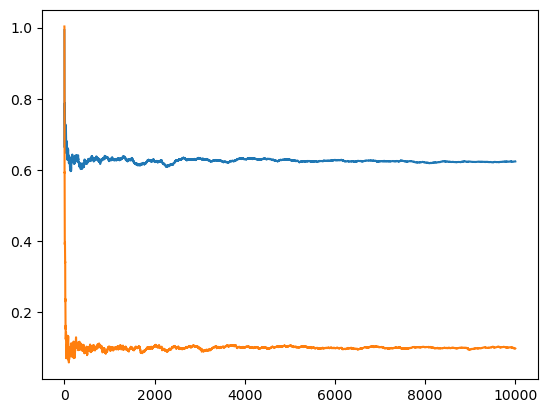

In [14]:
plt.plot(mhist)
plt.plot(chist)
plt.show()

In [ ]:
tt = np.linspace(0.1, 0.9, 50)
m_post = sigma0**2 * np.sum(data) / (n*sigma0**2 + sigma_x**2)
s2_post = 1/(n/sigma_x**2 + 1/sigma0**2)
y = np.exp(lnormpdf(tt, m_post, np.sqrt(s2_post)))

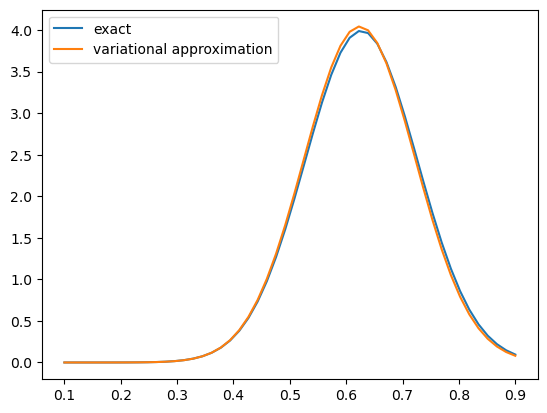

In [16]:
plt.plot(tt, y, label='exact')
y_vi = np.exp(lnormpdf(tt, m, np.abs(c)))
plt.plot(tt, y_vi, label='variational approximation')
plt.legend()
plt.show()

<br>

#### `PyTorch`

In [17]:
import torch
import math
import matplotlib.pyplot as plt
 
torch.set_default_dtype(torch.double)

In [18]:
def lnormpdf(x, mu, sigma):
    return (-0.5*math.log(2*math.pi)
            -torch.log(torch.tensor(sigma)) -0.5*(x-mu)**2/sigma**2)

In [19]:
def dsvi(m0, c0, logjoint, sample_eta, rho0, t0 = 100, niters = 10000):
    m = m0
    c = c0
    mhist = torch.zeros(niters)
    chist = torch.zeros(niters)
    for t in range(niters):
        eta = sample_eta()
        theta = (c * eta + m).detach().requires_grad_(True)
        v = logjoint(theta)
        v.backward()
        g = theta.grad
        m = m + rho0 / (t0 + t) * g
        c = c + rho0 / (t0 + t) * (g * eta + 1/c)
        theta.grad.zero_()
        mhist[t] = m
        chist[t] = c
    return m, c, mhist, chist

In [20]:
torch.manual_seed(42)

n = 100
data = 0.5 + torch.randn(n)

In [21]:
sigma_x = 1.0
mu0 = 0.0
sigma0 = 3.0

In [ ]:
def logjoint(mu, data=data, sigma_x=sigma_x, mu0=mu0, sigma0=sigma0):
    return lnormpdf(data, mu, sigma_x).sum() + lnormpdf(mu, mu0, sigma0)

In [22]:
m, c, mhist, chist = dsvi(1.0, 1.0, logjoint, lambda: torch.randn(1), 0.1)
print(m.item(), c.item())

0.6605256723408588 0.09835959585228018


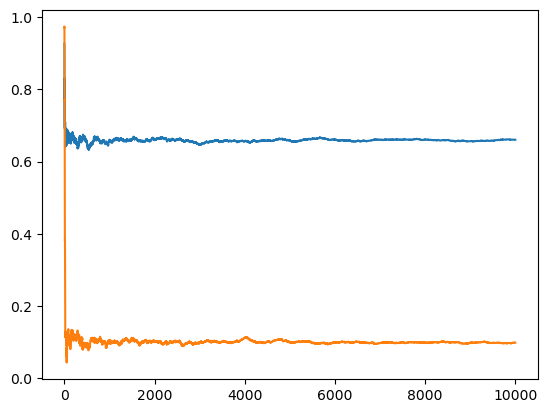

In [23]:
plt.plot(mhist.numpy())
plt.plot(chist.numpy())
plt.show()

#### 변분 방법은 추론 문제를 최적화 문제로 전환하여 근사 추론을 수행하는 접근법을 제공
#### 그 결과는 언제나 근사치이며, MCMC와 달리 알고리즘을 아무리 오래 실행해도 정확한 후방 분포에 수렴하지 않음